In [179]:
import pandas as pd
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import powerlaw
from scipy.stats import combine_pvalues, norm

In [180]:
path = R'C:\Users\nitai\OneDrive\MScCLS\Complex system simulation\FinancialNetwork\Data our model'


In [181]:
def get_files_with_parameters(directory_path, input_parameters):
    # Read all files in the directory
    all_files = os.listdir(directory_path)

    # List to hold DataFrames of files that match the input parameters
    matching_files_data = []

    for filename in all_files:
        # Split the filename on the first underscore to drop the initial number sequence
        parts = filename.split('_', 1)
        if len(parts) == 2:
            # Split the parameters part on the last underscore to drop the timestamp
            prefix, parameters_with_timestamp = parts
            parameters = '_'.join(parameters_with_timestamp.split('_')[:-1])
            
            # Check if the file parameters match the input parameters
            if input_parameters in parameters:
                # Construct the full path to the file
                file_path = os.path.join(directory_path, filename)
                # Read the CSV file into a DataFrame
                df = pd.read_csv(file_path)
                # Add the DataFrame to the list
                matching_files_data.append(df)

    return matching_files_data

In [182]:
runs = 5
N_agents = [100, 200, 300]
time_steps = 2000 # Number of simulation steps
delta_t = 1 # Time increment for Brownian motion
sigma_exposure_node = 1
sigma_intrestrate = 1
threshold_v = 5  # Bankruptcy threshold
linking_threshold = 1 # Threshold for forming links
swap_exposure_threshold = [2,4,8]
create_new_node_mode = True
time_to_maturity =  400
link_threshold_mode = 'hard cutoff'
link_formation_mode = 'divide exposure singly'
bankruptcy_mode = 'intrest_rate'

'2000_1_1_1_5_1_3_400_hard cutoff_divide exposure singly_intrest_rate'


'2000_1_1_1_5_1_3_400_hard cutoff_divide exposure singly_intrest_rate'

In [183]:
# {
#   "time_steps": 2000,
#   "delta_t": 1,
#   "sigma_exposure_node": 1
#   "sigma_intrestrate": 1,
#   "linking_threshold": 1,
#   "threshold_v": 5,
#   "runs": 1,
#   "time_to_maturity": 400,
#   "link_threshold_mode": "hard cutoff",
#   "link_formation_mode": 'random link logic'
#   "bankruptcy_mode": "exposure"  # Assuming 'divide exposure singly' is a misinterpretation
# }

time_steps = 2000 # Number of simulation steps
delta_t = 1 # Time increment for Brownian motion
sigma_exposure_node = [1,2,4]
sigma_intrestrate = 1
threshold_v = 5  # Bankruptcy threshold
linking_threshold = 1 # Threshold for forming links
swap_exposure_threshold = [2,4,8]
create_new_node_mode = True
time_to_maturity = [200, 400, 600]
link_threshold_mode = 'hard cutoff'
link_formation_mode = 'random link logic'
bankruptcy_mode = 'exposure'


In [184]:
input_parameters = '2000_1_1_1_5_1_3_400_hard cutoff_divide exposure singly_intrest_rate'

# Get the matching files
selected_files = get_files_with_parameters(path, input_parameters)

In [185]:
def select_variable_given_list_of_dfs(selected_dfs: list, variable_name: str):
    # List to hold Series or lists of the selected variable from each DataFrame
    list_of_series_or_lists = []

    for df in selected_dfs:
        # Check if the variable_name column exists to avoid KeyError
        if variable_name in df.columns:

            print('parameters', df.iloc[0,:1])
            # Drop first row from the DataFrame
            df = df.drop(df.index[0])

            # Extract the variable column as it contains NANs
            variable_series = df[variable_name]
            
            # Since the column is an object type (possibly containing lists or arrays), 
            # no conversion to numeric is done here. Instead, we directly append the column.
            list_of_series_or_lists.append(variable_series)
        else:
            print(f"The variable '{variable_name}' is not in the DataFrame.")

    print('list_of_series_or_lists:', list_of_series_or_lists)
    return list_of_series_or_lists

In [186]:
data = select_variable_given_list_of_dfs(selected_files, 'Abs Difference of Bankrupt Agents Over Time')

parameters Combination    (100, 2000, 1, 1, 1, 5, 1, 3, 400, 'hard cutoff')
Name: 0, dtype: object
parameters Combination    (200, 2000, 1, 1, 1, 5, 1, 3, 400, 'hard cutoff')
Name: 0, dtype: object
parameters Combination    (300, 2000, 1, 1, 1, 5, 1, 3, 400, 'hard cutoff')
Name: 0, dtype: object
list_of_series_or_lists: [1    [0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 2.0, 0.0, ...
2    [0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, ...
3    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...
4    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
5    [0.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 0.0,...
Name: Abs Difference of Bankrupt Agents Over Time, dtype: object, 1    [0.0, 0.0, 3.0, 0.0, 22.0, 0.0, 7.0, 0.0, 0.0,...
2    [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 2.0, ...
3    [0.0, 5.0, 1.0, 2.0, 0.0, 4.0, 30.0, 0.0, 0.0,...
4    [0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 1.0, 0.0, ...
5    [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...
Name: Abs Difference of Bankrupt Agents Over Time, dtype: obj

In [187]:
def convert_string_to_list(string):
    # Remove the square brackets
    string = string.strip('[]')
    # Split the string on commas
    string = string.split(',')
    # Convert each string in the list to a float
    string = [float(s) for s in string]
    return string

In [190]:
titles = ['100 Agents', '200 Agents', '300 Agents']

In [191]:
def plot_bankruptcy_analysis_multiple_arrays(data_array, titles):
    """
    Plots the bankruptcy analysis with three subplots for each file in data_array.
    :param data_array: List of pandas DataFrames with bankruptcy data.
    """
    for file_index, file in enumerate(data_array):
        plt.figure(figsize=(10, 12))
        for run in range(file.shape[0]):
            diff_bankrupt_agents = file.iloc[run]
            diff_bankrupt_agents = convert_string_to_list(diff_bankrupt_agents)
            time_steps = np.arange(len(diff_bankrupt_agents))

            # Subplot 1: Difference in Number of Bankrupt Agents
            plt.subplot(3, 1, 1)
            plt.plot(time_steps, diff_bankrupt_agents, label=f'Run {run}', color='orange')
            plt.xlabel('Time Step')
            plt.ylabel('Difference in Number of Bankrupt Agents')
            plt.title(f'N = File {titles[file_index]} - Difference in Number of Bankrupt Agents Over Time')
            plt.legend()

            # Subplot 2: Cumulative Histogram of Absolute Difference in Bankrupt Agents
            plt.subplot(3, 1, 2)
            plt.hist(np.abs(diff_bankrupt_agents), bins=50, cumulative=-1, log=True, color='green', label=f'Run {run} - Cumulative Histogram', histtype='step', density=True)
            plt.xscale('log')
            plt.xlabel('Absolute Difference in Number of Bankrupt Agents (Log Scale)')
            plt.ylabel('1 - Cumulative Count (Log Scale)')
            plt.title(f'N = {titles[file_index]} - Cumulative Histogram of |Difference in Bankrupt Agents| Over Time')
            plt.legend()

            # Subplot 3: Frequency of Absolute Differences in Number of Bankrupt Agents
            plt.subplot(3, 1, 3)
            unique_diffs, counts = np.unique(np.abs(diff_bankrupt_agents), return_counts=True)
            plt.scatter(unique_diffs, counts, label=f'Run {run}')
            plt.xlabel('Absolute Difference in Number of Bankrupt Agents')
            plt.ylabel('Frequency of Occurrence')
            plt.xscale('log')
            plt.yscale('log')
            plt.title(f'N = File {titles[file_index]} - Frequency of Absolute Differences in Number of Bankrupt Agents')
            plt.legend()

        plt.tight_layout()
        plt.show()


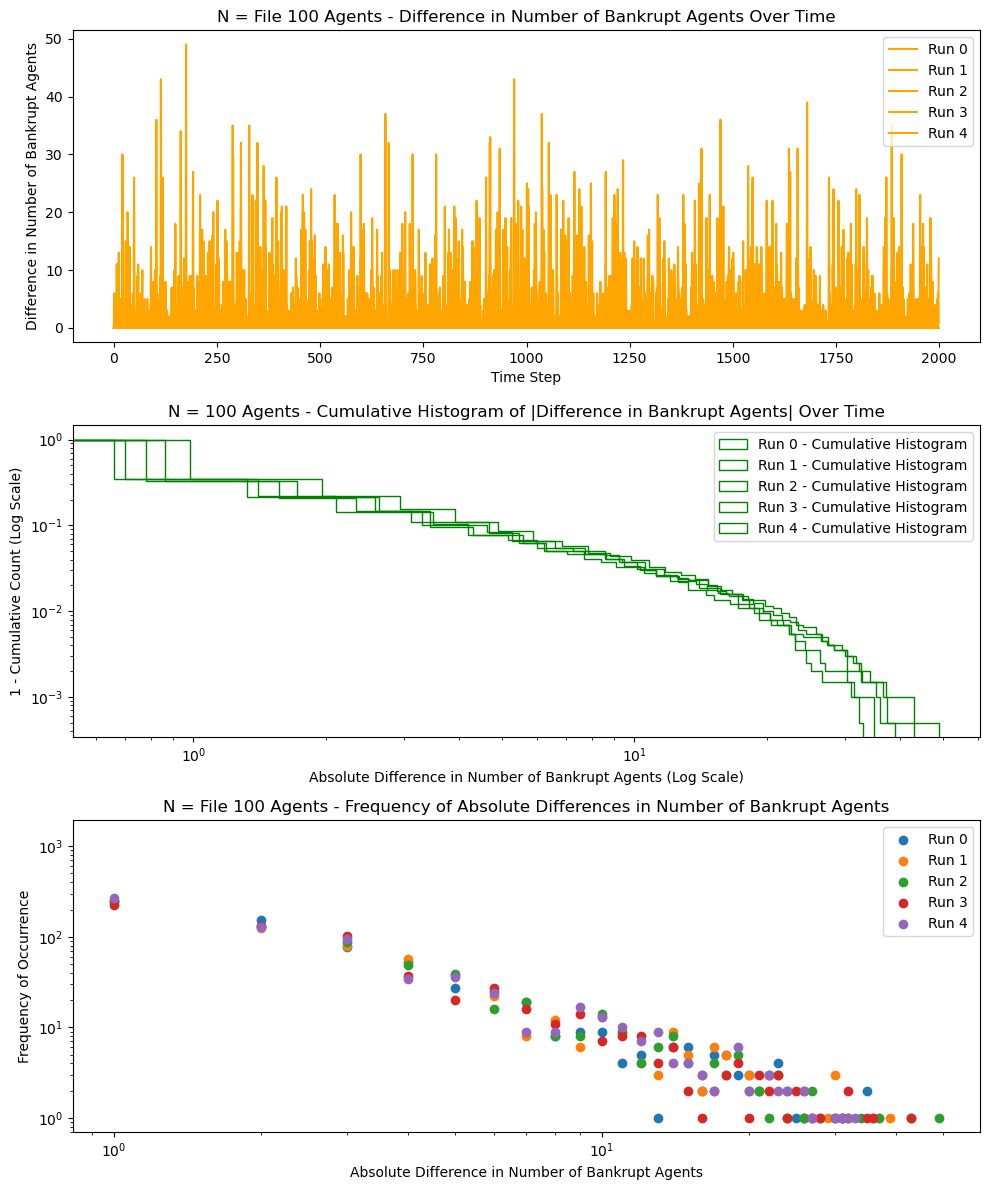

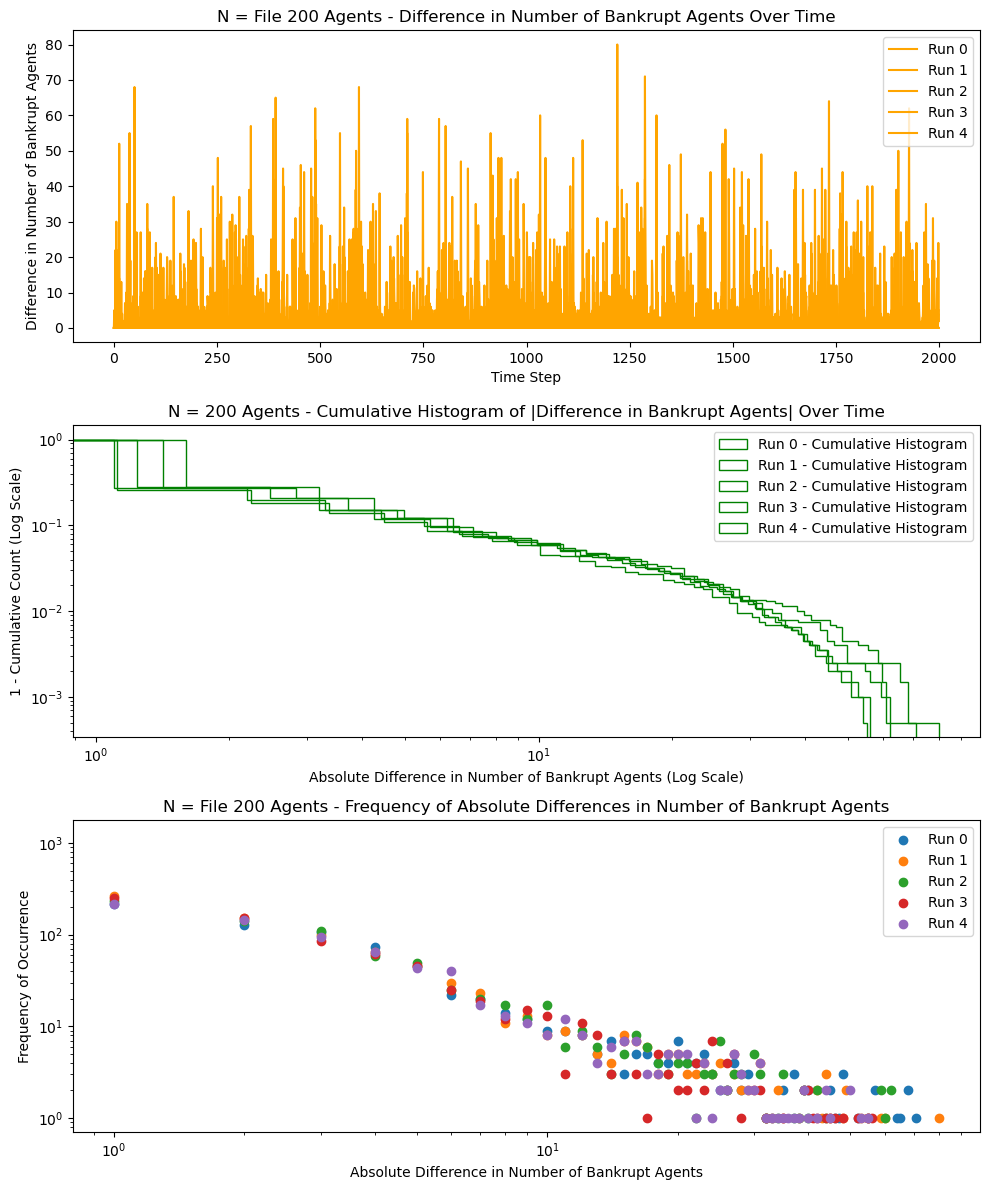

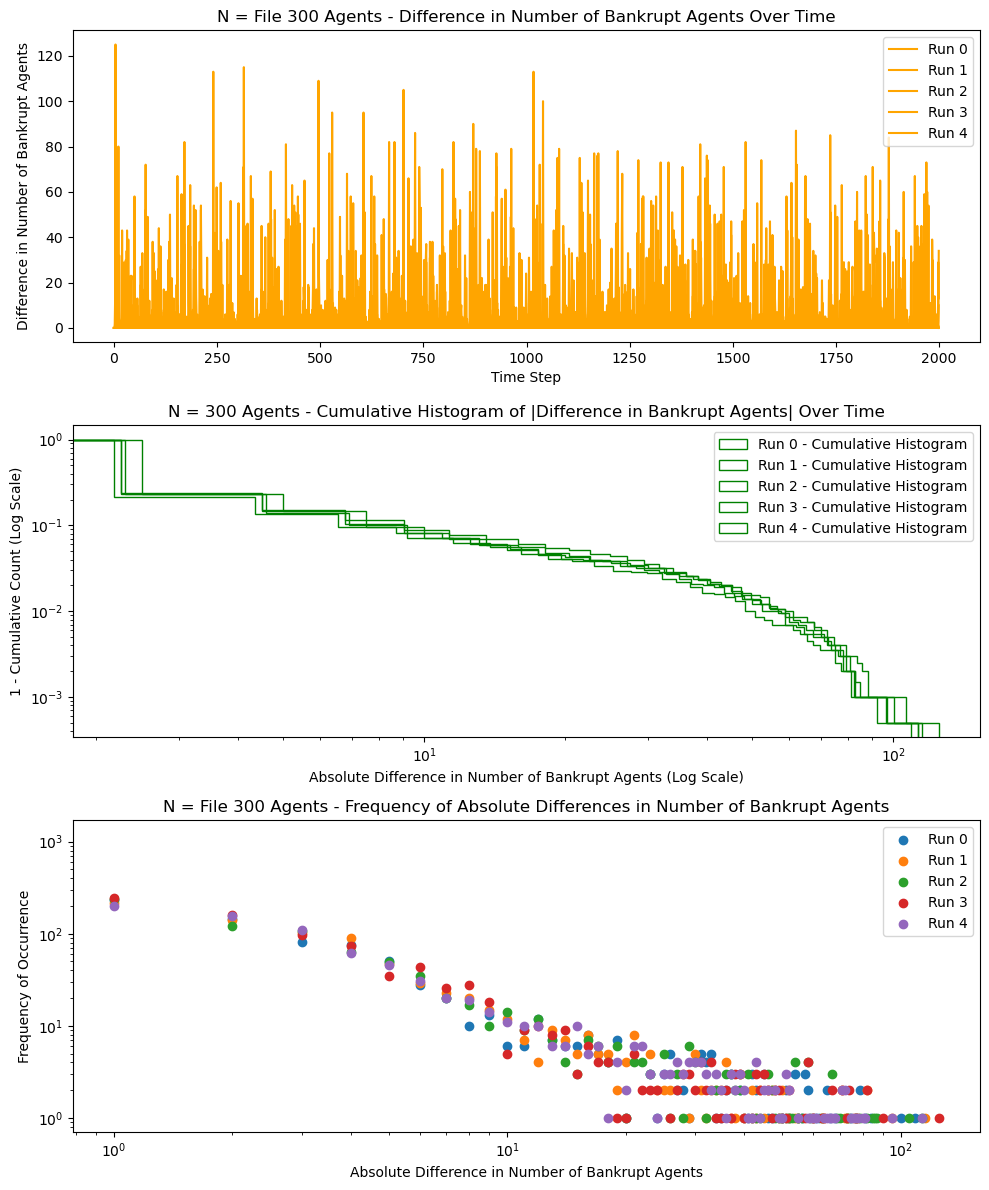

In [192]:
plot_bankruptcy_analysis_multiple_arrays(data, titles)

In [193]:
def probability_of_default(data_array, threshold):
    return [1 if x > threshold else 0 for x in data_array]/len(data_array)

In [194]:
def fit_power_law_array(data_array, titles):
    """
    Fit data from multiple arrays to a power-law distribution and compare it with an exponential distribution.
    Includes an aggregated p-value using Stouffer's Z-method in its own row below the runs it aggregates.

    Parameters:
    data_array (List[pd.DataFrame]): List of pandas DataFrames with data to be fitted.
    titles (List[str]): List of titles corresponding to each DataFrame in data_array.

    Returns:
    pd.DataFrame: A DataFrame containing individual run data and aggregated p-values for each title.
    """
    results_list = []

    for file_index, file in enumerate(data_array):
        p_values = []
        for run in range(file.shape[0]):
            diff_bankrupt_agents = file.iloc[run]
            diff_bankrupt_agents = convert_string_to_list(diff_bankrupt_agents)

            # Fit the data to a power-law distribution
            results = powerlaw.Fit(diff_bankrupt_agents)
            alpha = results.power_law.alpha
            R, p = results.distribution_compare('power_law', 'exponential', normalized_ratio=True)
            p_values.append(p)


            # Format p-value with significance levels
            p_value_formatted = f"{np.round(p, 4)}"
            if p < 0.001:
                p_value_formatted += "***"  # Highly significant
            elif p < 0.01:
                p_value_formatted += "**"   # Very significant
            elif p < 0.05:
                p_value_formatted += "*"    # Significant

            # Add results to list
            results_list.append({
                'N agents (Nodes)': titles[file_index],
                'run': run + 1,
                'alpha exponent': alpha,
                'likelihood ratio': R,
                'p-value': p_value_formatted
            })

            # Aggregate p-values for this title using Stouffer's Z-method from statsmodels
            combined_test_stat, aggregated_p_value = combine_pvalues(p_values, method='stouffer')


            # Format aggregated_p_value p-value with significance levels
            aggregated_p_value_formatted = f"{np.round(aggregated_p_value, 4)}"
            if aggregated_p_value < 0.001:
                aggregated_p_value_formatted += "***"  # Highly significant
            elif aggregated_p_value < 0.01:
                aggregated_p_value_formatted += "**"   # Very significant
            elif aggregated_p_value < 0.05:
                aggregated_p_value_formatted += "*"    # Significant



        results_list.append({
            'N agents (Nodes)': '',
            'run': 'Stouffer’s p-value',
            'alpha exponent': '',
            'likelihood ratio': '',
            'p-value': aggregated_p_value_formatted
        })

    # Create DataFrame for all results
    results_df = pd.DataFrame(results_list)
    return results_df

In [195]:
fit_power_law_array(data, titles)

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data

,N agents (Nodes),run,alpha exponent,likelihood ratio,p-value
0,100 Agents,1,2.582411,2.253132,0.0243*
1,100 Agents,2,2.495865,4.384189,0.0***
2,100 Agents,3,4.170634,-0.14068,0.8881
3,100 Agents,4,2.824595,-0.817323,0.4137
4,100 Agents,5,3.504318,0.322458,0.7471
5,,Stouffer’s p-value,,,0.0212*
6,200 Agents,1,2.229182,7.322882,0.0***
7,200 Agents,2,2.215366,5.920257,0.0***
8,200 Agents,3,2.239663,5.87563,0.0***
9,200 Agents,4,2.25435,5.218964,0.0***


In [196]:
data

[1    [0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 2.0, 0.0, ...
 2    [0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, ...
 3    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...
 4    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
 5    [0.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 0.0,...
 Name: Abs Difference of Bankrupt Agents Over Time, dtype: object,
 1    [0.0, 0.0, 3.0, 0.0, 22.0, 0.0, 7.0, 0.0, 0.0,...
 2    [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 2.0, ...
 3    [0.0, 5.0, 1.0, 2.0, 0.0, 4.0, 30.0, 0.0, 0.0,...
 4    [0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 1.0, 0.0, ...
 5    [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...
 Name: Abs Difference of Bankrupt Agents Over Time, dtype: object,
 1    [0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 4.0, ...
 2    [0.0, 0.0, 0.0, 2.0, 0.0, 3.0, 2.0, 1.0, 0.0, ...
 3    [0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 46.0,...
 4    [0.0, 0.0, 0.0, 0.0, 125.0, 0.0, 0.0, 0.0, 0.0...
 5    [0.0, 0.0, 0.0, 12.0, 0.0, 0.0, 2.0, 3.0, 0.0,...
 Name: Abs Difference of B

In [197]:
data

[1    [0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 2.0, 0.0, ...
 2    [0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, ...
 3    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...
 4    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
 5    [0.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 0.0,...
 Name: Abs Difference of Bankrupt Agents Over Time, dtype: object,
 1    [0.0, 0.0, 3.0, 0.0, 22.0, 0.0, 7.0, 0.0, 0.0,...
 2    [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 2.0, ...
 3    [0.0, 5.0, 1.0, 2.0, 0.0, 4.0, 30.0, 0.0, 0.0,...
 4    [0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 1.0, 0.0, ...
 5    [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...
 Name: Abs Difference of Bankrupt Agents Over Time, dtype: object,
 1    [0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 4.0, ...
 2    [0.0, 0.0, 0.0, 2.0, 0.0, 3.0, 2.0, 1.0, 0.0, ...
 3    [0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 46.0,...
 4    [0.0, 0.0, 0.0, 0.0, 125.0, 0.0, 0.0, 0.0, 0.0...
 5    [0.0, 0.0, 0.0, 12.0, 0.0, 0.0, 2.0, 3.0, 0.0,...
 Name: Abs Difference of B